In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        b,g,r = cv2.split(img)
        img2 = cv2.merge([r,g,b])
        plt.imshow(img2)
    elif len(img.shape) == 2:
        plt.imshow(img)

# 3.1 图像加分运算

### 3.1.1 加号运算

In [2]:
# 规则：a+b=mod(a+b,255)
# 若和<255,则值=两数之和，若和>255,则值是和对255取模
# 通过将数组类型定义为dtype=np.uint8,可以保证数组值范围在[0,255]之间

In [4]:
img1 = np.random.randint(0,255,size=[3,3],dtype=np.uint8)
img2 = np.random.randint(0,255,size=[3,3],dtype=np.uint8)
img3 = img1 + img2

print("img1:\n",img1)
print("img2:\n",img2)
print("img3:\n",img3)

img1:
 [[154 159 190]
 [158 108 155]
 [183 250 213]]
img2:
 [[237 124 200]
 [ 11  26 109]
 [233 152 122]]
img3:
 [[135  27 134]
 [169 134   8]
 [160 146  79]]


### 3.1.2 cv2.add()函数

In [5]:
# result = cv2.add(像素值a,像素值b)
# 会得到像素对图像的饱和值（最大值255），当和>255时，值=255
# 参数形式：
# 1.result = cv2.add(图像1，图像2): 参与运算的图像大小和类型必须保持一致
# 2.result = cv2.add(数值，图像)：将超过图像饱和值的值处理为饱和值（255）
# 3.result = cv2.add(图像，数值)：将超过图像饱和值的值处理为饱和值（255）

In [7]:
img1 = np.random.randint(0,255,size=[3,3],dtype=np.uint8)
img2 = np.random.randint(0,255,size=[3,3],dtype=np.uint8)
img3 = cv2.add(img1,img2)

print("img1:\n",img1)
print("img2:\n",img2)
print("img3:\n",img3)

img1:
 [[212  60 214]
 [235  48 179]
 [ 12 133 224]]
img2:
 [[141 158 147]
 [202  80  58]
 [ 99 123 205]]
img3:
 [[255 218 255]
 [255 128 237]
 [111 255 255]]


# 3.2 图像加权和

In [9]:
# 计算两幅图像像素之和时，考虑每幅图像的权重：
# dst = saturate(src1*a + src2*b +y)
# saturate:表示取饱和值
# 要求src1,src2必须大小，类型形同

# dst = cv2.addWeighted(src1,alpha,src2,beta,gamma)

In [10]:
img1 = np.random.randint(0,255,size=[3,3],dtype=np.uint8)
img2 = np.random.randint(0,255,size=[3,3],dtype=np.uint8)
gamma = 3
img3 = cv2.addWeighted(img1,0.6,img2,2,gamma)
print("img1:\n",img1)
print("img2:\n",img2)
print("img3:\n",img3)

img1:
 [[156 184  27]
 [148 173 125]
 [  1  70 245]]
img2:
 [[148  54 163]
 [ 37 200 245]
 [182 200 208]]
img3:
 [[255 221 255]
 [166 255 255]
 [255 255 255]]


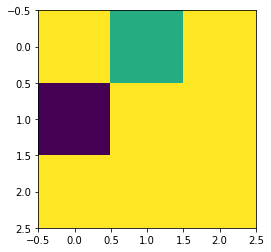

In [20]:
img_show(img3)

In [21]:
# 利用cv2.addWeighted()将ROI区域混合在另一幅图像上（索引替换值）

# 3.3 按位逻辑运算（位运算）

- cv2.bitwise_and():按位与
- cv2.bitwise_or():按位或
- cv2.bitwise_xor():按位异或
- cv2.bitwise_not():按位取反

### 3.3.1 按位与运算

In [24]:
# dst = cv2.bitwise_and(src1, src2[, mask])
# mask: 表示可选操作掩码，8位单通道array
# 特殊：按位与运算要求src1,src2必须有相同通道,需将单通道的掩模转成BGR3通道的图片进行按位与运算

# 特点：
# 1将任意数值N与数值0进行按位与操作，都会得到数值0
# 2将任意数值N（仅考虑8位值）与数值255（1111 1111）进行按位与操作，都会得到N本身
# 3任何数值与自身按位与运算，得到的结果仍是自身

In [28]:
# 使用数组演示与掩模图像的按位与运算
a = np.random.randint(0,255,size=(5,5),dtype=np.uint8)

b = np.zeros((5,5),dtype=np.uint8)
b[0:3,0:3] = 255
b[4,4] = 255

c = cv2.bitwise_and(a,b)

print("a:\n", a)
print("b:\n", b)
print("c:\n", c)

# 数组c来源于数组a与数组b的按位与运算，c中的值，与b中255对应位置上的值来源于a，与b中0对应位置上的值为0
# 理解：掩模b相当于用0将a中对应位置的值掩盖了，只显示a中与255对应的值

a:
 [[127  85  58  85 137]
 [ 75  50 141 189   2]
 [254 181 115  16 216]
 [166 175  53 212 133]
 [179 204 184  55 239]]
b:
 [[255 255 255   0   0]
 [255 255 255   0   0]
 [255 255 255   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 255]]
c:
 [[127  85  58   0   0]
 [ 75  50 141   0   0]
 [254 181 115   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 239]]


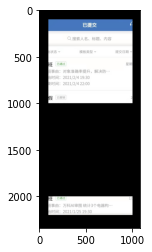

In [38]:
img = cv2.imread("/Users/tanjun/Desktop/加班截图/WechatIMG115.jpeg")

ym = np.zeros(img.shape, dtype=np.uint8)
ym[100:1000,100:1000] = 255
ym[2000:2200,100:1000] = 255

img2 = cv2.bitwise_and(img,ym)
img_show(img2)

### 3.3.2 按位或运算

In [39]:
# dst = cv2.bitwise_or(src1,src2[,mask])
# mask: 表示可选操作掩码，8位单通道array

### 3.3.3 按位非运算

In [40]:
# dst = cv2.bitwise_not(src[,mask])
# mask: 表示可选操作掩码，8位单通道array

### 3.3.4 按位异或运算

In [41]:
# dst = cv2.bitwise_xor(src1,src2[,mask])
# mask: 表示可选操作掩码，8位单通道array

# 运算规则与不带进位的二进制加法类似，结果是和的最后一位
# xor(0,0) = 0
# xor(1,0) = 1
# xor(0,1) = 1
# xor(1,1) = 0

# 3.4 掩模

In [42]:
# opencv中很多函数都会指定一个掩模（掩码）
# 如：dst = cv2.add(src1, src2, mask)
# 当指定掩模参数时，操作只会在掩模值为非空的像素点上执行，并将其他像素点的值置为0

In [51]:
img1 = np.ones((4,4),dtype=np.uint8)*3
img2 = np.ones((4,4),dtype=np.uint8)*5
mask = np.zeros((4,4),dtype=np.uint8)
mask[2:4,2:4] = 1
img3 = cv2.add(img1,img2,mask=mask)

print("img1:\n", img1)
print("img2:\n", img2)
print("mask:\n", mask)
print("img3:\n", img3)

img1:
 [[3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]
 [3 3 3 3]]
img2:
 [[5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]
 [5 5 5 5]]
mask:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 1 1]
 [0 0 1 1]]
img3:
 [[0 0 0 0]
 [0 0 0 0]
 [0 0 8 8]
 [0 0 8 8]]


In [52]:
# 构建一个掩模图像，将该掩模图像作为按位与函数的掩模参数，实现保留图像指定部分
# 利用任何数值与自己进行按位与运算得到的还是自身的特点

# 3.5 图像与数值的运算

In [53]:
# 在上述加法和按位运算中，参与运算的两个算子既可以是两幅图像，也可以是一幅图像与一个数值
# img3 = cv2.add(img1,img2)
# img3 = cv2.add(img1,4)  # 整体增加图像亮度
# img3 = cv2.add(4,img1)  # 整体增加图像亮度

# 3.6 位平面分解

In [55]:
# 将灰度图像中处于同一比特位上的二进制像素进行组合，得到一幅二进制图像，该图像称为灰度图像的一个平面位，这个过程称为位平面分解

# value = a7*2^7 + a6*2^6 + a5*2^5 + a4*2^4 + a3*2^3 + a2*2^2 + a1*2^1 + a0*2^0  # 一个像素点的值表示
# 权重越大，对图像的影响越大
# 取一幅8位灰度图内每个像素相同比特位值的组合，构成一个位平面图（按位切片），共可切8个位平面图

# 对于RGB图像，对每个通道对应的位平面进行合并，即可组成新的RGB彩色图

In [56]:
# 位平面分解步骤：
# 1图像预处理：读取原始图像，获取宽高
# 2构造提取矩阵：使用按位与操作能够很方便地将一个数值特定位上的数字提取出来，提取因子哪位上的值位1，就可将哪位上的值提出来，构造提取矩阵
# 3提取位平面：将灰度图与提取矩阵进行按位与运算，得到各个位平面。
#            将像素值与一个值为2^n的数值进行按位与运算，能够使该像素的第n位爆出不变，其余各位置0，因此能通过像素值与特定值的按位与运算，
#            能够提取像素值的特定二进制位的值，同理，通过按位与运算，能够提取像素的指定位平面。
#            提示：提取位平面也可以通过将二进制像素值右移指定位，然后对2取模得到。如要提取第n个位平面，则可将像素向右移动n位，然后对2取模 
# 4阈值处理：通过计算得到的位平面是一个二值图像，值小时显示接近与黑色，所以需将>0的值处理成255
#          mask = RD[:,:,i] > 0
#          RD[mask] = 255
# 5显示图像：

In [65]:
# 观察灰度图各个位平面
img = cv2.imread("/Users/tanjun/Desktop/加班截图/WechatIMG115.jpeg", 0)
r,c = img.shape

x = np.zeros((r,c,8), dtype=np.uint8)
for i in range(8):
    x[:,:,i] = 2**i
    
r = np.zeros((r,c,8), dtype=np.uint8)
for i in range(8):
    r[:,:,i] = cv2.bitwise_and(img,x[:,:,i])
    mask = r[:,:,i]>0
    r[mask] = 255
    cv2.imshow(str(i), r[:,:,i])
    
cv2.waitKey()
cv2.destroyAllWindows()

# 3.7 图像加密和解密

In [1]:
# 通过按位异或运算可以实现图像的加密和解密
# 通过对原始图像与密钥图像进行按位异或，可以实现加密；将加密后的图像与密钥图像再次按位异或，可以实现解密

# --------------------------------------
# a b c:c=xor(a,b) a=xor(c,b) b=xor(c,a)
# --------------------------------------
# 0 0 0            0          0
# 0 1 1            0          1
# 1 0 1            1          0
# 1 1 0            1          1
# --------------------------------------

# 若 xor(a,b) = c
# 则 xor(c,b) = a
# 则 xor(c,a) = b

# a: 明文，原始数据
# b: 密钥
# c: 密文，通过xor(a,b)

# 图像处理中，需处理的像素点通常是灰度值[0,255]，用另一个值的二进制与之按位异或，实现加密:
# bit_xor(216,178) = 106  # 加密
# bit_xor(106,178) = 216  # 解密

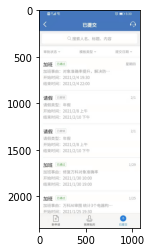

In [11]:
img = cv2.imread("/Users/tanjun/Desktop/加班截图/WechatIMG115.jpeg")

r,c,n = img.shape
key = np.random.randint(0,255,size=(r,c,n),dtype=np.uint8)

encryption = cv2.bitwise_xor(img,key)
decryption = cv2.bitwise_xor(encryption,key)

img_show(decryption)

# 3.8 数字水印

In [13]:
# 最低有效位：一个二进制数的第0位（最低位）
# 最低有效位信息隐藏：将一个需要隐藏的二值图信息嵌入载体的最低有效位，即将载体图像的最低有效位层替换为当前需要隐藏的位置图像，
#                 实现将二值图像隐藏的目的。必要时，将载体图最低有效位层提取出来，达到提取秘密信息的目的。这种信息隐藏也被称作水印。

# 原理：
# 1.嵌入过程：将载体图像第0个位平面替换位数字水印信息
#      1）原始载体图像预处理：将灰度图像素点处理成二进制，取最低有效位
#      2）水印图像处理：将水印图像通过阈值处理成二值图像，再将255转换成1，编程真正二值图像
#      3）嵌入水印：将载体图像最低有效位替换成二进制水印图像，完成嵌入，再将二进制载体图像转化成十进制，肉眼难辨。
# 2.提取过程：将载体图像的最低有效位构成的第0个位平面提取出来，得到数字水印信息
#      1）将载体图像转换成二进制，提取最低有效位
#      2）根据需要将1转化为255，还原水印二值图

# 为提高鲁棒性，可以在多个通道嵌入相同水印，即使部分丢失，其他通道也能提取形同水印信息
# 为提高嵌入容量，可在不同通道嵌入不同水印

In [14]:
# 实现方法：
# 1.嵌入过程：
#      1）载体图像预处理：获取载体图像行M列N数，并对其进行二进制标记
#      2）建立提取矩阵：建立M*N大小，元素值均为254的提取矩阵，用来提取图像的高七位
#      3）保留图像高七位，将最低位置0（按位与运算）（保留高七位还可以将像素右移一位，再左移一位得到）
#      4）水印图像处理：将水印图处理成二值图，二值图转换成二进制（高位填0）
#      5）嵌入水印：载体图进行保留高七位，最低位置0后得到新图，将新图与水印图按位或运算，实现嵌入
#      6）显示图像：
# 2.提取过程：
#      1）含水印载体图像处理：获取含水印图像大小
#      2）建立提取矩阵：定义一个与含水印图像等大小，值为1的矩阵作为提取矩阵
#      3）提取水印信息：将含水印图像与提取矩阵进行按位与运算，提取水印信息，进行阈值处理，还原成255
#      4）计算去除水印后的载体图像：将含水印载体图像最低位清零即可删除水印，建立值为254的等大小矩阵，与含水印图进行按位与运算
#      5）显示图像：

# 提示：将像素值对2取模，可获取像素值的最低有效位，因此可通过让含说印图像对2取模的方式，获取图像最低有效位位平面，取到的结果就是说印信息

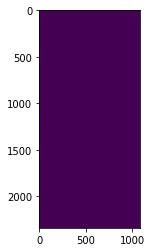

In [32]:
# 载体图
img = cv2.imread("/Users/tanjun/Desktop/加班截图/WechatIMG115.jpeg",0)
c,r = img.shape

# 水印图
watermark = np.random.randint(0,255,size=(c,r),dtype=np.uint8)
watermark[watermark[:,:]>=100] = 1
watermark[watermark[:,:]<100] = 0

# 嵌入过程
t254 = np.ones((c,r),dtype=np.uint8)*254
imgH7 = cv2.bitwise_and(img,t254)
e = cv2.bitwise_or(imgH7,watermark)

# 提取过程
t1 = np.ones((c,r),dtype=np.uint8)
wm = cv2.bitwise_and(e,t1)
wm[wm[:,:]>0] = 255

# 显示
img_show(wm)

# 3.9 脸部打码及解码

In [6]:
img = cv2.imread("/Users/tanjun/Desktop/加班截图/WechatIMG115.jpeg",0)
c,r = img.shape

mask = np.zeros((c,r),dtype=np.uint8)
mask[220:400,250:350] = 1

# 获取一个key，打码、解码使用的密钥
key = np.random.randint(0,255,size=(c,r),dtype=np.uint8)

# 获取打码脸
imgXorKey = cv2.bitwise_xor(img,key)  # 使用密钥key对原始图像进行加密
encryptFace = cv2.bitwise_and(imgXorKey,mask*255)  # 获取加密图像的脸部信息
noFacel = cv2.bitwise_and(img,(1-mask)*255)  # 将图像的脸部信息设置成0
maskFace = encryptFace + noFacel  # 得到打码的图像

# 将打码脸解码
extractOriginal = cv2.bitwise_xor(maskFace,key)  # 将脸部打码的图像与密钥key进行异或运算，得到脸部原始信息
extractFace = cv2.bitwise_and(extractOriginal,mask*255)  # 将解码的脸部信息提取出来
noFace2 = cv2.bitwise_and(maskFace,(1-mask)*255)  # 从脸部打码的图像内提取没有脸部的信息
extractImg = noFace2+extractFace  # 得到解码的图像

# 显示图像
cv2.imshow("img", img)
cv2.imshow("mask", mask)
cv2.imshow("key", key)
cv2.imshow("imgXorkey", imgXorKey)
cv2.imshow("encryptFace", encryptFace)
cv2.imshow("noFacel", noFacel)
cv2.imshow("maskFace", maskFace)
cv2.imshow("extractOriginal", extractOriginal)
cv2.imshow("noFace2", noFace2)
cv2.imshow("extractImg", extractImg)
cv2.waitKey()
cv2.destroyAllWindows()